In [1]:
from jaff.network import Network

In [2]:
net = Network("../networks/test.dat")

Welcome to JAFF: Just Another Fancy Format!
Loading network from ../networks/test.dat
Network label = test


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 569.31it/s]

PRIZMO variable detected: invt = 1d0 / Tgas
PRIZMO variable detected: t32 = Tgas / 3d2
3.61e-12/t32**0.75
0.46*crate
3.39e-10*exp(-3.761*av)
4.4e-12/(Tgas/300.0)**0.61
2.00000000000000e-14
1.00000000000000e-20
1.00000000000000e-33
1.30000000000000e-12
photorates(0, 13.6, 1.0e+99)
photorates(1, 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000.0, 1.0e+99)
5.0*crate
1.22000000000000e-12
7.40000000000000e-11
5.6e-11*Tgas**0.5*exp(-102124.0*invT)
KROME format detected: @format:R,R,P,P,rate
4.30000000000000e-13
Variables found: ['Tgas', 'av', 'crate', 'invT', 'tgas']
Loaded 15 reactions
Lodaded 2 photo-chemistry reactions
Sink:  CH2
Source:  CH
Sink:  N2+
Sink:  H2
All done!


In [3]:
# list some stuff
print([x.name for x in net.species])  # variable names
print([x.latex for x in net.species])  # latex names
print([x.mass for x in net.species])  # masses, g
print([x.charge for x in net.species]) # charges, e

print([x.get_verbatim() for x in net.reactions])  # reactionw names
print([x.get_latex() for x in net.reactions])  # latex names

print(net.reactions[0].get_verbatim())  # verbatim name of first reaction
print(net.reactions[0].serialized)

print(net.reactions[0].get_c())  # rate in C format of first reaction
print(net.reactions[0].get_f90())  # rate in Fortran 90 format of first reaction

print(net.reactions[0].is_same(net.reactions[0]))  # check if the first reaction is the same as itself
print(net.reactions[0].is_same(net.reactions[1]))  # check if the first reaction is the same as the second

print(net.reactions[0].get_flux(rate_variable="krate"))  # flux of first reaction in symbolic form

net.reactions[0].rate  # rate of first reaction in symbolic form

['H+', 'e-', 'H', 'C', 'C+', 'CO+', 'CO', 'O', 'CH2', 'CH', 'N2', 'N', 'N2+', 'H2']
['{\\rm H^{+}}', '{\\rm e^{-}}', '{\\rm H}', '{\\rm C}', '{\\rm C^{+}}', '{\\rm CO^{+}}', '{\\rm CO}', '{\\rm O}', '{\\rm CH_{2}}', '{\\rm CH}', '{\\rm N_{2}}', '{\\rm N}', '{\\rm N_{2}^{+}}', '{\\rm H_{2}}']
[1.673773e-24, 9.109383e-28, 1.673773e-24, 1.994473e-23, 1.994473e-23, 4.6512359999999996e-23, 4.6512359999999996e-23, 2.656763e-23, 2.3292276e-23, 2.1618503e-23, 4.651734e-23, 2.325867e-23, 4.651734e-23, 3.347546e-24]
[1, -1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
['H+ + e- -> H', 'H -> H+ + e-', 'C -> C+ + e-', 'C+ + e- -> C', 'CO+ + e- -> CO', 'C + O -> CO', 'CO -> C + O', 'CO -> CO+ + e-', 'H -> H+ + e-', 'CH2 -> CH + H', 'N2 -> N + N', 'N + N -> N2', 'CO + N2+ -> N2 + CO+', 'H2 + e- -> H + H + e-', 'CO + N2+ -> N2 + CO+']
['${\\rm H^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm H}$', '${\\rm H}\\,\\to\\,{\\rm H^{+}} + {\\rm e^{-}}$', '${\\rm C}\\,\\to\\,{\\rm C^{+}} + {\\rm e^{-}}$', '${\\rm C^{+}} + {\\rm 

2.60224476150794e-10/Min(300.0, tgas)**0.75

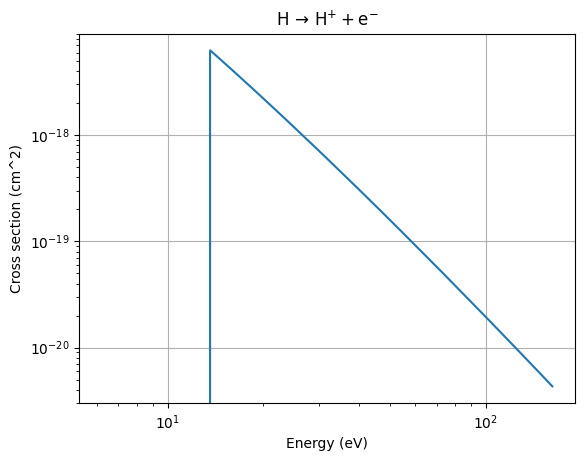

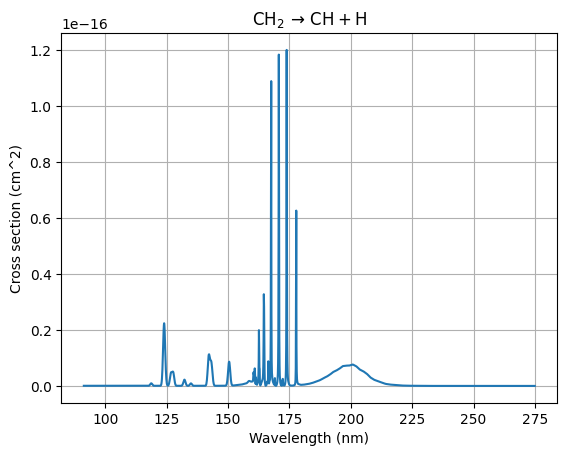

In [4]:
a = net.get_reaction_by_verbatim("H -> H+ + e-", rtype="photo")  # get reaction by verbatim name
a.plot_xsecs()

a = net.get_reaction_by_verbatim("CH2 -> CH + H")  # get photodissociation reaction
a.plot_xsecs(energy_unit='nm', energy_log=False, xsecs_log=False)  # plot cross-sections

In [5]:
from jaff.builder import Builder

b = Builder(net)
b.build()

Building network with template: python_solve_ivp
Preprocessing /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/templates/python_solve_ivp/commons.py -> /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/builds/commons.py
Preprocessing /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/templates/python_solve_ivp/rates.py -> /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/builds/rates.py
Preprocessing /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/templates/python_solve_ivp/fluxes.py -> /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/builds/fluxes.py
Preprocessing /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/templates/python_solve_ivp/ode.py -> /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/builds/ode.py
Copying /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/templates/python_solve_ivp/main.py to /Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/builds
Network built successfully using template 'python_solve_ivp'.
Output files are l

'/Users/benwibking/amrex_codes/chemistry/jaff/src/jaff/builds'

In [6]:
net2 = Network("../networks/test2.dat", label="very small network")

Welcome to JAFF: Just Another Fancy Format!
Loading network from ../networks/test2.dat
Network label = very small network


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 521.39it/s]

2.0e-12*tgas**0.33
1.0e-12*exp(-1.222*av)
Variables found: ['av', 'tgas']
Loaded 2 reactions
Lodaded 0 photo-chemistry reactions
All done!


In [7]:
net.compare_reactions(net2)  # compare two networks

Comparing networks "test" and "very small network"...
Found in "test" but not in "very small network": C+ + e- -> C
Found in "test" but not in "very small network": CH2 -> CH + H
Found in "test" but not in "very small network": CO + N2+ -> N2 + CO+
Found in "test" but not in "very small network": CO -> C + O
Found in "test" but not in "very small network": C + O -> CO
Found in "test" but not in "very small network": C -> C+ + e-
Found in "test" but not in "very small network": H+ + e- -> H
Found in "test" but not in "very small network": H2 + e- -> H + H + e-
Found in "test" but not in "very small network": H -> H+ + e-
Found in "test" but not in "very small network": N2 -> N + N
Found in "test" but not in "very small network": N + N -> N2
Found 2 reactions in common
0 reactions missing in "test"
11 reactions missing in "very small network"


In [8]:
net.compare_species(net2)  # compare species in two networks

Comparing species in networks "test" and "very small network"...
Found 3 species in common: ['CO', 'CO+', 'e-']
Found 11 species in "test" but not in "very small network": ['C', 'C+', 'CH', 'CH2', 'H', 'H+', 'H2', 'N', 'N2', 'N2+', 'O']
Found 0 species in "very small network" but not in "test": []


2.60224476150794e-10/Min(300.0, tgas)**0.75


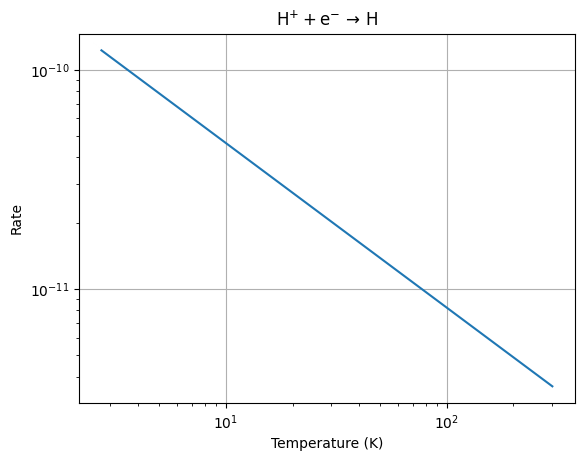

In [9]:
print(net.reactions[0].rate)  # verbatim name of first reaction in COthin network
net.reactions[0].plot()